<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Taxa_de_crescimento_express%C3%A3o_Linder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos plotar a função taxa de crescimento de estruturas $f$ e como seu comportamento varia de acordo com os parâmetros: $w_0$, $\Omega_{k0}$,  $\Omega_{m0}$ e $w_a$ considerando que $f(z) = \Omega_m ^\gamma (z)$.

In [1]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy.interpolate as interp
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

conda-forge/linux-64                                        Usin

In [3]:
import pyccl as ccl

A seguir, temos os 11 dados de $f$ e $z$ retirados de https://arxiv.org/pdf/2201.07829.pdf e que serão colocados nas curvas de degenerescência entre dois parâmetros.

In [4]:
f_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91, 0.90])
f_erro = np.array([0.07, 0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36, 0.24])
z_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77, 1.40])

Primeiramente, manteremos os valores de $\Omega_{k0}$ e $\Omega_{m0}$ fixos de acordo com os valores obtidos pelo Planck e iremos variar $w_0$ entre -1.2 e -0.8 (lembrando que no modelo $\Lambda$CDM temos que $w_0$ = -1).

Lembrando que:

$\Omega_m (a) = \frac{\Omega_{m0} a^{-3}}{\Omega_{m0} a^{-3} + \Omega_{k0} a^{-2} + \Omega_{\Lambda 0}}$,

em que:

$\Omega_{\Lambda 0} = 1 - \Omega_{m0}$.

Logo:

$\Omega_m (a) = \frac{\Omega_{m0} a^{-3}}{\Omega_{m0} a^{-3} + \Omega_{k0} a^{-2} + 1 - \Omega_{m0}}$.

Então, neste primeiro caso consideraremos $\Omega_{m0}$ = 0.30 e $\Omega_{k0}$ = 0.

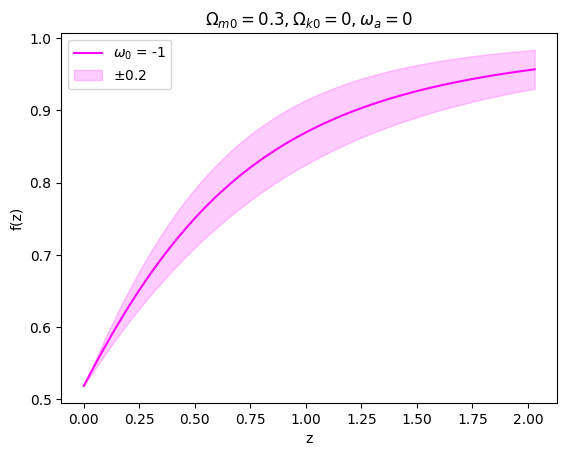

In [5]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.33, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo, a)  # contraste

# definindo o redshift em função do fator de escala
z = (1/a) - 1.

# constantes
H0 = 70 #km/s/Mpc
Om0 = 0.30

# definindo O_m
Om = (Om0*(a**(-3)))/(Om0*(a**(-3)) + 1 - Om0)

# definindo w0
w0 = -1
sigw0 = 0.2

# definindo gamma
gamma = 6./11.

# definindo f conforme Linder
f = Om ** gamma

# definindo o erro de f
f_1 = (Om0*((1 + z)**3))/( Om0*((1 + z)**3) + ( 1 - Om0 )*( (1 + z)**(3*(1+w0)) ) )
f_2 = (1 - Om0)*( (1+z)**(3*(1 + w0)) ) + Om0*((1 + z)**3)
df = ( (3*(Om0 - 1)*Om0*gamma*((1+z)**(3*(1+w0) + 3))*np.log(1+z) )/(f_2)**2)*((f_1)**(gamma-1))
sig_f = ((df)*sigw0)

fig, ax = plt.subplots()
ax.plot(z, f, label='$\omega_0$ = -1', color='magenta')
plt.xlabel('z')
plt.ylabel('f(z)')
ax.fill_between(z, f - sig_f, f + sig_f, alpha=0.2, label='$\pm$0.2', color='magenta')
plt.legend(loc='upper left')
plt.title('$\Omega_{m0} = 0.3, \Omega_{k0} = 0, \omega_a = 0$')
plt.show()

Agora, vamos manter $w_0$ e $\Omega_{k0}$ fixos em -1 e 0, respectivamente, e variar $\Omega_{m0}$ entre 0.25 e 0.35

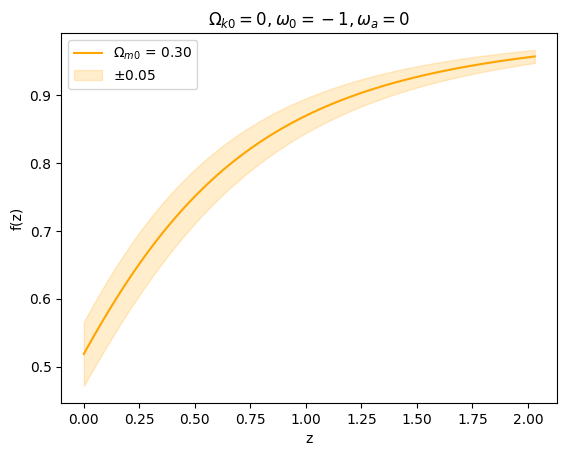

In [6]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.33, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo, a)  # contraste

# definindo o redshift em função do fator de escala
z = (1/a) - 1.

# constantes
H0 = 70 #km/s/Mpc
Om0 = 0.30

# definindo O_m
Om = (Om0*(a**(-3)))/(Om0*(a**(-3)) + 1 - Om0)
sigOm0 = 0.05

# definindo gamma
gamma = 6./11.

# definindo f conforme Linder
f = Om ** gamma

# definindo o erro de f
df1 = gamma*( ((1+z)**3)/f_2 - ( ((1+z)**3)*Om0*( ((1+z)**3) -  (1+z)**(3*(1 + w0)) ) )/( (f_2)**2) )*( (f_1)**(gamma-1) )
sig_f1 = ((df1)*sigOm0)

fig, ax = plt.subplots()
ax.plot(z, f, label='$\Omega_{m0}$ = 0.30', color='orange')
plt.xlabel('z')
plt.ylabel('f(z)')
ax.fill_between(z, f - sig_f1, f + sig_f1, alpha=0.2, color='orange', label='$\pm$0.05')
plt.legend(loc='upper left')
plt.title('$\Omega_{k0} = 0, \omega_0 = -1, \omega_a = 0$') 
plt.show()

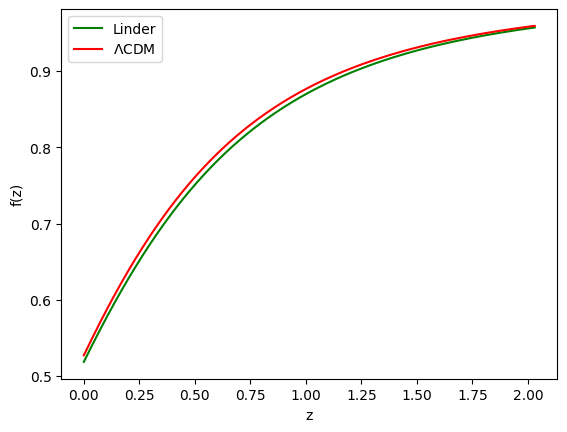

In [32]:
# definindo f conforme Linder
f = Om ** gamma

x = np.log(a)
y = np.log(delta)

ft = np.gradient(y, x) # função taxa de crescimento



plt.plot(z, f, color='green', label='Linder')
plt.plot(z, ft, color='red', label='$\Lambda$CDM')

# legenda, título e eixos
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

Faremos um gráfico com os valores do modelo $\Lambda$CDM com as variações para $\Omega_{m0}$ e $\omega_0$ escolhidas: $\pm$ 0.05 e $\pm$ 0.2, respectivamente.

[0.30739565]
[[0.00276181]]


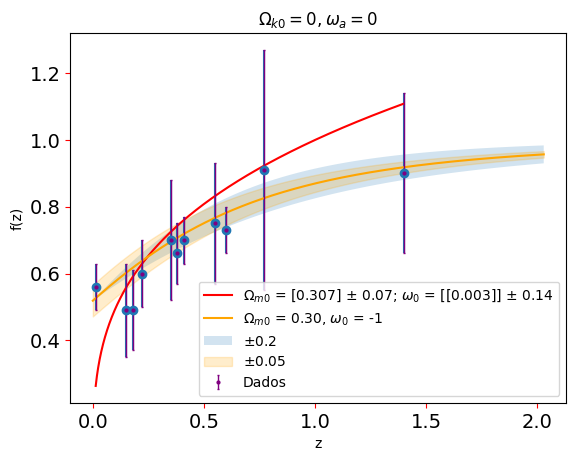

In [26]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.33, 1, 1000)  # fator de escala

# definindo O_m
Om = (Om0*(a**(-3)))/(Om0*(a**(-3)) + 1 - Om0)



# definindo a função f para o caso de Om e w0 variando

def f1_teorico(Om, gamma):

    f1_teorico = Om ** gamma

    return f1_teorico


# ajuste da função

popt = curve_fit(f1_teorico, z_dados, f_dados)
print(popt[0])
print(popt[1])

p1 = popt[0]
p2 = popt[1]

erro = f_erro
e1 = erro[0]
e2 = erro[1]

# plote

#best-fit
zi = np.linspace(min(z_dados), max(z_dados), 1000)

fig, ax = plt.subplots()
plt.tick_params(labelsize=14, color='red')
plt.errorbar(z_dados, f_dados, f_erro, fmt='o')
plt.plot(zi, f1_teorico(zi, popt[0]), color='red', label=r'$\Omega_{m0}$ = '+str(np.round(p1, 3))+' $\pm$ '+str(np.round(e1, 4))+'; '+'$\omega_0$ = '+str(np.round(p2, 3))+' $\pm$ '+str(np.round(e2, 4)))

#curvas e dados
#ax.plot(z, f, label='$\omega_0$ = -1', color='blue')
ax.plot(z, f, label='$\Omega_{m0}$ = 0.30, $\omega_0$ = -1', color='orange')
plt.errorbar(z_dados, f_dados, yerr = f_erro, color = 'purple', label='Dados', fmt='o', markersize=2, elinewidth=1, capsize=1)

# área sombreada
ax.fill_between(z, f - sig_f, f + sig_f, alpha=0.2, label='$\pm$0.2')
ax.fill_between(z, f - sig_f1, f + sig_f1, alpha=0.2, color='orange', label='$\pm$0.05')

# legenda, título e eixos
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('$\Omega_{k0} = 0, \omega_a = 0$')
plt.show()